# COVID-19 Vaccinations and LifeModes

## <i> Jacob Seboly, Esra Ozdenerol

### Data Preparation

In [11]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

#### County Dataset
This county-level dataset comes from ESRI's Tapestry data. It provides the dominant LifeMode for each U.S. county as well as the number of households in the county classified for each LifeMode.

In [14]:
county_file_path = "https://raw.githubusercontent.com/jseboly/COVID_VAX_LMS/main/counties.csv?token=AWAL2P2VMXAZLGBSQV42QYDBRV52A"

In [15]:
counties_orig = pd.read_csv(county_file_path)

In [16]:
#The relevant columns are: the county FIPS code, the dominant LifeMode number, and the number of households in each LifeMode.
co = counties_orig.iloc[:,[1,7,79,80,81,82,83,84,85,86,87,88,89,90,91,92]]

In [17]:
#rename the columns to shorter, clearer names 
co = co.rename(columns = {'ID':'FIPS', 'TLIFECODE':'DLM', 'THHGRPL1':'LM1', 'THHGRPL2':'LM2', 'THHGRPL3':'LM3', 'THHGRPL4':'LM4',
                         'THHGRPL5':'LM5', 'THHGRPL6':'LM6', 'THHGRPL7':'LM7', 'THHGRPL8':'LM8', 'THHGRPL9':'LM9', 'THHGRPL10':'LM10',
                         'THHGRPL11':'LM11', 'THHGRPL12':'LM12', 'THHGRPL13':'LM13', 'THHGRPL14':'LM14'})

In [18]:
#Convert FIPS field to integer to facilitate join later
co["FIPS"] = pd.to_numeric(co["FIPS"])

<i>Column names:</i>
<br>FIPS = FIPS code
<br>DLM = dominant lifemode
<br>LM1 = households belonging to LifeMode 1;
<br>and so on for all 14 LifeModes

Preparation of the county dataset is complete.

#### Vaccination Data
"COVID Vaccinations in the United States, County" Source: CDC <br> Information: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh <br> Contains vaccinations by county, new record added for each county every day. 

In [19]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# First 5000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8xkx-amqh", limit=5000)

# Convert to pandas DataFrame
vax_orig = pd.DataFrame.from_records(results)

In [20]:
vax_orig[1:11]

,date,fips,mmwr_week,recip_county,recip_state,series_complete_pop_pct,series_complete_yes,series_complete_12plus,series_complete_12pluspop,series_complete_18plus,...,svi_ctgy,series_complete_pop_pct_svi,series_complete_12pluspop_pct_svi,series_complete_18pluspop_pct_svi,series_complete_65pluspop_pct_svi,metro_status,series_complete_pop_pct_ur_equity,series_complete_12pluspop_pct_ur_equity,series_complete_18pluspop_pct_ur_equity,series_complete_65pluspop_pct_ur_equity
1,2021-11-10T00:00:00.000,22055,45,Lafayette Parish,LA,45.7,111752,111747,54.4,105102,...,C,11,12,12,12,Metro,3,4,4,4
2,2021-11-10T00:00:00.000,37195,45,Wilson County,NC,47.1,38554,38531,55.3,36388,...,D,15,16,16,16,Non-metro,7,8,8,8
3,2021-11-10T00:00:00.000,37143,45,Perquimans County,NC,43.3,5829,5828,49.2,5677,...,C,11,11,12,12,Non-metro,7,7,8,8
4,2021-11-10T00:00:00.000,39149,45,Shelby County,OH,32.8,15918,15918,38.9,15387,...,A,2,2,3,3,Non-metro,6,6,7,7
5,2021-11-10T00:00:00.000,31073,45,Gosper County,NE,35.9,715,715,41.4,689,...,A,2,3,3,3,Non-metro,6,7,7,7
6,2021-11-10T00:00:00.000,13129,45,Gordon County,GA,16.4,9487,9486,19.3,8589,...,D,13,13,13,13,Non-metro,5,5,5,5
7,2021-11-10T00:00:00.000,21137,45,Lincoln County,KY,37.1,9097,9097,44.0,8664,...,C,10,11,11,11,Non-metro,6,7,7,7
8,2021-11-10T00:00:00.000,36023,45,Cortland County,NY,54,25689,25689,61.6,24076,...,B,8,8,8,8,Non-metro,8,8,8,8
9,2021-11-10T00:00:00.000,48385,45,Real County,TX,46.1,1591,1591,51.7,1553,...,C,11,12,12,12,Non-metro,7,8,8,8
10,2021-11-10T00:00:00.000,16051,45,Jefferson County,ID,34,10155,NaN,NaN,10152,...,B,6,NaN,8,8,Metro,2,NaN,4,4


In [21]:
#The relevant columns to be selected are date, FIPS, and the number of fully vaccinated people (series_complete_yes), 
#and the percentage of fully vaccinated people compared to eligible population
vx = vax_orig.iloc[:,[0,1,6,8]]

In [22]:
#rename the columns to shorter, clearer names 
vx = vx.rename(columns = {'date':'Date', 'fips':'FIPS', 'series_complete_yes':'FV', 'series_complete_12pluspop':'FV%'})

<i>Column names:</i>
<br>Date = Date and Time
<br>FIPS = FIPS code
<br>FV = number fully vaccinated
<br>FV% = percentage of eligible population fully vaccinated
<br>EP = total eligible population

In [23]:
#Subset the rows with FIPS not missing
vx = vx[vx.FIPS != 'UNK']

In [24]:
vx["FV"] = pd.to_numeric(vx["FV"])
vx["FV%"] = pd.to_numeric(vx["FV%"])
vx["Date"] = pd.to_datetime(vx["Date"])
vx["FIPS"] = pd.to_numeric(vx["FIPS"])

In [25]:
#Select only the observations for the most recent date
today = input('Two Days Ago? (yyyy-mm-dd):')#always use two days ago- record date will be one day ago
vx = vx[(vx['Date'] > today) & (vx['Date'] <= '2021-12-31')]

Two Days Ago? (yyyy-mm-dd):2021-11-09


In [26]:
#add a new column representing the total over-12 population
vx['EP'] = vx['FV'] * 100 / vx['FV%']
vx['EP'] = round(vx['EP'], 0)

<b>Now the LifeMode data and vaccination data are joined together based on FIPS.

In [27]:
df = pd.merge(co, vx, how='left', on='FIPS')

In [28]:
df[1:11]

,FIPS,DLM,LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9,LM10,LM11,LM12,LM13,LM14,Date,FV,FV%,EP
1,1003,10,2233,0,0,20781,13287,10095,0,8339,7293,25013,0,1230,0,0,2021-11-10,100555,52.2,192634.0
2,1005,10,0,0,0,600,809,528,0,0,0,5557,401,1909,0,0,2021-11-10,9614,44.9,21412.0
3,1007,10,0,0,0,0,0,0,0,453,0,6990,0,674,0,0,2021-11-10,7017,36.0,19492.0
4,1009,10,0,0,0,1000,569,2168,0,0,0,17826,0,600,0,0,2021-11-10,16365,33.2,49292.0
5,1011,10,0,0,0,0,0,0,0,0,0,3846,0,0,0,0,2021-11-10,4582,52.8,8678.0
6,1013,10,0,0,0,0,565,306,0,515,0,5403,0,1508,0,0,2021-11-10,6925,41.5,16687.0
7,1015,10,0,0,0,1023,5487,10119,0,3003,489,15959,1896,7085,0,1304,2021-11-10,47689,48.8,97723.0
8,1017,10,0,0,0,0,612,1384,0,0,0,8742,0,3113,0,0,2021-11-10,9414,32.9,28614.0
9,1019,10,0,0,0,0,0,2054,0,0,0,8189,0,281,0,0,2021-11-10,7607,33.0,23052.0
10,1021,10,0,0,0,0,282,1528,0,409,0,13439,0,1409,0,0,2021-11-10,14114,37.7,37438.0


<b> Data Preparation Complete

### Exploratory Data Analysis

First, we examine the distribution of the fully vaccinated people variable.

In [29]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt

In [32]:
df['FV'].describe()

count    3.142000e+03
mean     5.726387e+04
std      2.041503e+05
min      0.000000e+00
25%      4.197500e+03
50%      1.078950e+04
75%      3.183400e+04
max      6.294328e+06
Name: FV, dtype: float64

In [33]:
df['FV%'].describe()

count    3098.000000
mean       51.927598
std        14.676954
min         0.000000
25%        43.500000
50%        51.800000
75%        61.075000
max        99.900000
Name: FV%, dtype: float64

#### Descriptive Stats for Fully Vaccinated by County
| Stat        | Raw Count   | Percentage |
| ----------- | ----------- | ---------- |
| Mean        | 57,264      | 51.9%      |
| St. Dev.    | 204,150     | 14.7%      |
| Minimum     | 0           | 0.0%       |
| 25%         | 4,197       | 43.5%      |
| Median      | 10,790      | 51.8%      |
| 75%         | 31,834      | 61.1%      |
| Maximum     | 6,294,328   | 99.9%      |

Text(0, 0.5, 'Counties')

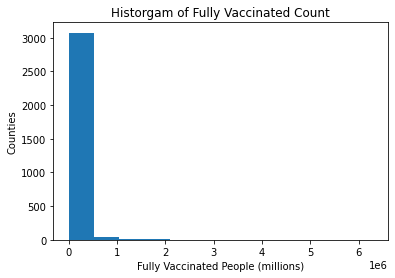

In [34]:
fig, ax = plt.subplots()
ax.hist(df['FV'], bins=12)
ax.set_title('Historgam of Fully Vaccinated Count')
ax.set_xlabel('Fully Vaccinated People (millions)')
ax.set_ylabel('Counties')

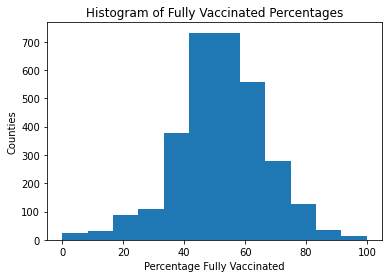

In [35]:
plt.hist(df['FV%'], bins=12)
plt.title('Histogram of Fully Vaccinated Percentages')
plt.xlabel('Percentage Fully Vaccinated')
plt.ylabel('Counties')
plt.show()

Note the distribution for raw count is extremely right-skewed; this is because it is based on county populations. The distribution for percentage is slightly left-skewed, indicating that there are more counties with low vaccination percentages balanced by a few counties with very high vaccination percentages. Finally, the mean vaccination percentage by county is significantly lower than the percentage for the U.S. overall, indicating that the counties with low vaccination rates are generally smaller (in population) than the counties with high vaccination rates.

In [36]:
df.corr()

,FIPS,DLM,LM1,LM2,LM3,LM4,LM5,LM6,LM7,LM8,LM9,LM10,LM11,LM12,LM13,LM14,FV,FV%,EP
FIPS,1.000000,-0.067432,-0.043032,-0.055540,-0.029081,-0.039799,-0.004662,0.054454,-0.045036,-0.034229,-0.103703,-0.025112,-0.026545,-0.025205,-0.042575,-0.015188,-0.050694,0.040483,-0.060937
DLM,-0.067432,1.000000,-0.289174,-0.156127,-0.069380,-0.217469,-0.186760,-0.269555,-0.042946,-0.135833,-0.068873,0.377890,-0.060940,0.020189,0.000663,0.040522,-0.146302,-0.322384,-0.137572
LM1,-0.043032,-0.289174,1.000000,0.717678,0.439425,0.643961,0.496798,0.183708,0.619241,0.677969,0.574925,0.084635,0.581427,0.292308,0.493859,0.353059,0.827779,0.292417,0.828746
LM2,-0.055540,-0.156127,0.717678,1.000000,0.617274,0.221729,0.162287,0.015657,0.453355,0.627408,0.387546,-0.000928,0.349654,0.172682,0.744186,0.244121,0.791209,0.182188,0.762147
LM3,-0.029081,-0.069380,0.439425,0.617274,1.000000,0.182062,0.158771,0.008122,0.393461,0.585153,0.338619,0.004317,0.500981,0.274589,0.716421,0.228912,0.700881,0.134883,0.677327
LM4,-0.039799,-0.217469,0.643961,0.221729,0.182062,1.000000,0.553685,0.334778,0.654222,0.546461,0.517931,0.235235,0.634609,0.316951,0.209406,0.331913,0.598250,0.228394,0.643516
LM5,-0.004662,-0.186760,0.496798,0.162287,0.158771,0.553685,1.000000,0.521964,0.298219,0.572094,0.552002,0.110776,0.539378,0.614794,0.149552,0.387042,0.520603,0.293758,0.548032
LM6,0.054454,-0.269555,0.183708,0.015657,0.008122,0.334778,0.521964,1.000000,0.110145,0.222282,0.271370,0.142320,0.168676,0.341623,0.027228,0.170822,0.231273,0.275828,0.261963
LM7,-0.045036,-0.042946,0.619241,0.453355,0.393461,0.654222,0.298219,0.110145,1.000000,0.534096,0.487912,0.184832,0.622108,0.247797,0.581174,0.254990,0.759981,0.144744,0.781866
LM8,-0.034229,-0.135833,0.677969,0.627408,0.585153,0.546461,0.572094,0.222282,0.534096,1.000000,0.612537,0.086665,0.815047,0.437056,0.622970,0.425518,0.865786,0.279192,0.864099


### Modeling

In [37]:
%pip install sklearn
%pip install scipy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
from sklearn import datasets, linear_model
import sklearn as sk

A model will be created to predict vaccination rates. Number of fully vaccinated people will be the response variable; the household counts for each lifemode will be the predictor variables (yielding 14 predictors). While some lifemodes will inevitably be correlated, we cannot remove any from the model because, in predicting vaccination rates for block groups, there will be some block groups which have zero households of certain lifemodes. If the model was limited to certain lifemodes and a block group had zero households of all these lifemodes, a vaccination rate of zero would be predicted which does not make sense.

First, we attempt a basic linear regression model. <br>
Formula: FV = LM1 + LM2 + ... + LM14

In [46]:
y = df['FV']
x = df.iloc[:,2:16]

In [56]:
#Split into training and testing
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.2)

In [63]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train) 

LinearRegression()

In [65]:
print("Intercept: ", regr.intercept_)
print("Coefficients:")
list(zip(x, regr.coef_))

Intercept:  -54.89828930234944
Coefficients:


[('LM1', 1.849425782489388),
 ('LM2', 2.063563354133562),
 ('LM3', 1.4397737264280366),
 ('LM4', 0.5796365112387869),
 ('LM5', 1.3494289088080254),
 ('LM6', 1.25234207816892),
 ('LM7', 2.1935056398137567),
 ('LM8', 2.5042807293760436),
 ('LM9', 1.3749220495394148),
 ('LM10', 0.7682174147424602),
 ('LM11', 0.2572993339758771),
 ('LM12', 1.1328270260311761),
 ('LM13', 2.001520774371888),
 ('LM14', -0.021027339885047347)]

#### Model Coefficients
<i> Interpretation: Fully Vaccinated Individuals per Household </i> <br>

| LM#  | Life Mode Name        | Coefficient|
| ---- | --------------------- | ---------- |
| 1    | Affluent Estates      | 1.849      |
| 2    | Upscale Avenues       | 2.064      |
| 3    | Uptown Individuals    | 1.440      |
| 4    | Family Landscapes     | 0.580      |
| 5    | GenXUrban             | 1.349      |
| 6    | Cozy Country Living   | 1.252      |
| 7    | Ethnic Enclaves       | 2.194      |
| 8    | Middle Ground         | 2.504      |
| 9    | Senior Styles         | 1.375      |
| 10   | Rustic Outposts       | 0.768      |
| 11   | Midtown Singles       | 0.257      |
| 12   | Hometown              | 1.133      |
| 13   | Next Wave             | 2.002      |
| 14   | Scholars and Patriots | -0.021     |


In [66]:
regr.score(x_train, y_train)

0.9880979385212719

R-squared = 0.988